<a href="https://colab.research.google.com/github/luisamariacastro/HousePrices/blob/main/03_Modelos_e_iteraciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar dependencias

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#bibliotecas de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc


import warnings
warnings.filterwarnings('ignore')

Configurar Kaggle Api

In [3]:
! pip install -q kaggle

In [4]:
! wget https://raw.githubusercontent.com/luisamariacastro/HousePrices/main/kaggle.json

--2023-11-25 19:25:57--  https://raw.githubusercontent.com/luisamariacastro/HousePrices/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      68  --.-KB/s    in 0s      

2023-11-25 19:25:57 (1.21 MB/s) - ‘kaggle.json’ saved [68/68]



In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
carlmcbrideellis/llm-7-prompt-training-dataset                   LLM: 7 prompt training dataset                     41MB  2023-11-15 07:32:56           1017         88  1.0              
thedrcat/daigt-v2-train-dataset                                  DAIGT V2 Train Dataset                             29MB  2023-11-16 01:38:36            513         73  1.0              
muhammadbinimran/housing-price-prediction-data                   Housing Price Prediction Data                     763KB  2023-11-21 17:56:32           1278         26  1.0              
thedrcat/daigt-proper-train-dataset                              

Descargar datasets de la competencia

In [9]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 82.5MB/s]


In [10]:
! mkdir /content/data/

Descomprimir el archivo descargado

In [11]:
! unzip /content/house-prices-advanced-regression-techniques.zip -d /content/data/

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: /content/data/data_description.txt  
  inflating: /content/data/sample_submission.csv  
  inflating: /content/data/test.csv  
  inflating: /content/data/train.csv  


## 1. Lectura de los Dataset

In [12]:
#cargar los datos
train = pd.read_csv("data/train.csv")

In [13]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train['SalePrice']=np.log1p(train['SalePrice'])

## 4. Tratamiento de datos

#### 4.1. Eliminación de las columnas con muchos datos faltantes

In [16]:
criterio = len(train) * 0.5 #criterio para eliminar la columna (50% de las filas que se tienen)
train.dropna(axis=1, thresh = criterio, inplace = True) #eliminación de las columnas con 50% o más de datos faltantes
print('New Shape of Train Data:',train.shape)

New Shape of Train Data: (1460, 77)


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### 4.2. Relleno de datos numéricos faltantes

In [18]:
train['LotFrontage'].fillna(train.LotFrontage.median(), inplace=True)
train['MasVnrArea'].fillna(train.MasVnrArea.median(), inplace=True)
train['GarageYrBlt'].fillna(train.GarageYrBlt.median(), inplace=True)


#### 4.3. Transformación de las variables categoricas

In [19]:
var_categoricas = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
encoder = preprocessing.LabelEncoder()

for i in var_categoricas:

    train[i] = encoder.fit_transform(train[i])

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247699
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109016
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317171
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849405
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429220


In [21]:
#Matriz de correlaciones
corr_matrix = train.corr()





In [22]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = pd.DataFrame(corr_matrix["SalePrice"].sort_values(ascending=False))
target_corr_df

,SalePrice
SalePrice,1.000000
OverallQual,0.817185
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
...,...
GarageType,-0.503129
KitchenQual,-0.534387
ExterQual,-0.582164
BsmtQual,-0.591290


###Se eliminan las variables con correlación más baja debido debido a que no están relacionadas con la variable objetivo

In [41]:
train.drop(['TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','GarageYrBlt','BsmtFinSF1','Foundation','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','CentralAir','Electrical','PavedDrive','BsmtFullBath','RoofStyle','BsmtUnfSF','SaleCondition','Neighborhood','HouseStyle','BedroomAbvGr','RoofMatl','ExterCond','Functional','ScreenPorch','Exterior2nd','Exterior1st','PoolArea','Condition1','LandSlope','MoSold','3SsnPorch','Street','MasVnrType','GarageCond','LandContour','BsmtCond','BsmtFinType2','Condition2','GarageQual','BsmtFinSF2','Utilities','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','SaleType','LotConfig','OverallCond','MSSubClass','BldgType','Heating','BsmtFinType1','EnclosedPorch','KitchenAbvGr','MSZoning','LotShape','BsmtExposure','HeatingQC','GarageType','FireplaceQu','GarageFinish','KitchenQual','BsmtQual','ExterQual'],axis = 1)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,2,548,12.247699
1,6,1262,1262,1262,2,2,460,12.109016
2,7,920,920,1786,2,2,608,12.317171
3,7,756,961,1717,1,3,642,11.849405
4,8,1145,1145,2198,2,3,836,12.429220
...,...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,2,460,12.072547
1456,6,1542,2073,2073,2,2,500,12.254868
1457,7,1152,1188,2340,2,1,252,12.493133
1458,5,1078,1078,1078,1,1,240,11.864469


## 5. Métodos Supervisados

#### 5.1. Selección de Modelos

##### Métrica:
La métrica para medir el desempeño de los modelos es el RMSLE (Root Mean Squared Logarithmic Error), sin embargo, ya que aplicamos una transformación logarítmica sobre la variable objetivo (SalePrice), podemos usar directamente el RMSE(Root Mean Squared Error) para obtener el valor de la métrica.

In [42]:
#Función para reportar el error del modelo
def report_cv_score(z):

    #RMSE en prueba y entrenamiento
    lr_ts_score = z['test_score']*(-1)
    lr_tr_score = z['train_score']*(-1)
    lin_rmse_ts = np.sqrt(lr_ts_score)
    lin_rmse_tr = np.sqrt(lr_tr_score)
    print("RMLSE Test: ", "{:.5f}".format(np.mean(lin_rmse_ts)), "(±", "{:.8f}".format(np.std(lin_rmse_ts)),")")
    print("RMLSE Train: ", "{:.5f}".format(np.mean(lin_rmse_tr)), "(±", "{:.8f}".format(np.std(lin_rmse_tr)),")")

In [43]:
#Función para calcular el RMSLE de los modelos implementados
def RMSLE(y_actual, y_pred):
    return np.sqrt(mean_squared_error(y_actual, y_pred))

In [44]:
X = train.drop(['SalePrice'],axis = 1)
y = train['SalePrice'].values

In [45]:
#--------Partición de los datos------------

from sklearn.model_selection import train_test_split

test_size = 0.2
val_size  = test_size/(1-test_size) # Elementos de validación

print (X.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtv, ytv son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que se usan para testear el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=test_size)
print (Xtv.shape, Xts.shape)

(1460, 76) (1460,)
test size 0.20
val size is 0.25 (relative to 0.80) 
(1168, 76) (292, 76)


In [28]:
estimator1 = DecisionTreeRegressor(max_depth=5)
estimator2 = RandomForestRegressor(n_estimators = 2,max_depth = 5)

In [46]:
#Selección de modelos

zscores = []
estimators = [estimator1, estimator2]
for estimator in estimators:
    print("---------")
    z = cross_validate(estimator, Xtv, ytv, return_train_score=True, return_estimator=False,
                       scoring="neg_mean_squared_error", cv=ShuffleSplit(n_splits=10, test_size=val_size))
    report_cv_score(z)
    zscores.append(np.mean(np.sqrt(z['test_score']*(-1))))
best = np.argmin(zscores)
print ("Seleccionado: ", best)
best_estimator = estimators[best]
print ("\n Mejor modelo: ")
print (best_estimator)

---------
RMLSE Test:  0.21198 (± 0.01713133 )
RMLSE Train:  0.15139 (± 0.00335312 )
---------
RMLSE Test:  0.19476 (± 0.01412333 )
RMLSE Train:  0.15154 (± 0.00501525 )
Seleccionado:  1

 Mejor modelo: 
RandomForestRegressor(max_depth=5, n_estimators=2)


El modelo que da el mejor rendimiento es el RandomForest , por lo que se tomará este modelo para trabajar.

#### 5.2. Mejores hiperparámetros de los modelos seleccionados

Se usará la herramienta de la libreria Scikit-Learn que permite analizar diferentes hiperparámetros para un modelo con el fin de obtener la mejor selección de los mismos y obtener un modelo más robusto. Esta heramient utiliza una metodología de cross-validation y se le puede brindar un diccionario con diferentes valores para cada hiperparámetros y así hallar cual es la mejor opción.

In [47]:
from sklearn.model_selection import GridSearchCV

5.2.2. Random Forest

In [48]:
#Esta celda toma un tiempo considerable en completarse
parametros = { 'n_estimators': [3,5,10,15],
              'max_depth':[5,7,9,11]}

forest_reg = GridSearchCV(estimator = estimator2,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size),
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)
forest_reg.fit(Xtv, ytv)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None),
             estimator=RandomForestRegressor(max_depth=5, n_estimators=2),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11],
                         'n_estimators': [3, 5, 10, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [49]:
print("Mejor estimador Random Forest: ",forest_reg.best_estimator_)
print("Mejores parámetros para el estimador Random Forest: ", forest_reg.best_params_)

Mejor estimador Random Forest:  RandomForestRegressor(max_depth=11, n_estimators=15)
Mejores parámetros para el estimador Random Forest:  {'max_depth': 11, 'n_estimators': 15}


###### Implementación del mejor Random Forest

In [50]:
Rdm_forest = RandomForestRegressor(n_estimators = 15,max_depth = 11)
Rdm_forest.fit(Xtv, ytv)

RandomForestRegressor(max_depth=11, n_estimators=15)

In [51]:
#Desempeño del modelo Random Forest seleccionado

print('RMSLE del Random Forest en entrenamiento: ',"{:.5f}".format(RMSLE((ytv) , (Rdm_forest.predict(Xtv)))))
print('RMSLE del Random Forest seleccionado: ',"{:.5f}".format(RMSLE(yts , Rdm_forest.predict(Xts))))

RMSLE del Random Forest en entrenamiento:  0.06488
RMSLE del Random Forest seleccionado:  0.14481


## 6. Métodos no supervisados

#### 6.1. PCA

In [52]:
X = train.drop(['SalePrice'],axis = 1)
y = train['SalePrice'].values

In [53]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,3,3,0,4,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,68.0,11250,1,0,3,0,4,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,60.0,9550,1,0,3,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,84.0,14260,1,0,3,0,2,...,84,0,0,0,0,0,12,2008,8,4


In [54]:
from sklearn.decomposition import PCA
components = [1,3,5,7,9]
test_size = 0.2
val_size  = test_size/(1-test_size)
perf = [] #desempeños de los modelos
Rdm_forest = RandomForestRegressor(n_estimators = 15,max_depth = 11)
for i in components:
    pca = PCA(n_components = i)
    X_t = pca.fit_transform(X)

    #Partición de datos
    #Xtv, ytv son los datos que se usan para entrenar el modelo
    #Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
    Xtv, Xts, ytv, yts = train_test_split(X_t, y, test_size=test_size)
    print (Xtv.shape, Xts.shape)

    Rdm_forest.fit(Xtv, ytv)
    perf.append(RMSLE(yts , Rdm_forest.predict(Xts)))
    print('RMSLE del modelo con ', i ,'elementos: ',"{:.5f}".format(RMSLE(yts , Rdm_forest.predict(Xts))))
    print('------------')

print('Mejor RMSLE: ',"{:.5f}".format(np.min(perf)),'  ; obtenido con ',components[np.argmin(perf)],' componentes para PCA')

(1168, 1) (292, 1)
RMSLE del modelo con  1 elementos:  0.39680
------------
(1168, 3) (292, 3)
RMSLE del modelo con  3 elementos:  0.20235
------------
(1168, 5) (292, 5)
RMSLE del modelo con  5 elementos:  0.21909
------------
(1168, 7) (292, 7)
RMSLE del modelo con  7 elementos:  0.18872
------------
(1168, 9) (292, 9)
RMSLE del modelo con  9 elementos:  0.20480
------------
Mejor RMSLE:  0.18872   ; obtenido con  7  componentes para PCA


In [55]:
#MEJOR PCA
pca = PCA(n_components = 7)
X_t1 = pca.fit_transform(X)
Xtv, Xts, ytv, yts = train_test_split(X_t1, y, test_size=test_size)
print (Xtv.shape, Xts.shape)

(1168, 7) (292, 7)


In [56]:
#Nota: Correr esta celda toma un tiempo considerable
parametros = { 'n_estimators': [5,10,15],
              'max_depth':[7,7,11]}

forest_reg = GridSearchCV(estimator = estimator2,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size),
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)
forest_reg.fit(Xtv, ytv)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None),
             estimator=RandomForestRegressor(max_depth=5, n_estimators=2),
             n_jobs=-1,
             param_grid={'max_depth': [7, 7, 11], 'n_estimators': [5, 10, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [57]:
print("Mejor estimador Random Forest: ",forest_reg.best_estimator_)
print("Mejores parámetros para el estimador Random Forest: ", forest_reg.best_params_)

Mejor estimador Random Forest:  RandomForestRegressor(max_depth=11, n_estimators=15)
Mejores parámetros para el estimador Random Forest:  {'max_depth': 11, 'n_estimators': 15}


In [58]:
#Mejor random forest para el PCA obtenido
test_size = 0.2
val_size  = test_size/(1-test_size)
Xtv, Xts, ytv, yts = train_test_split(X_t1, y, test_size=test_size)
print (Xtv.shape, Xts.shape)
Rdm_forest = RandomForestRegressor(n_estimators = 15,max_depth = 11)
Rdm_forest.fit(Xtv, ytv)

(1168, 7) (292, 7)


RandomForestRegressor(max_depth=11, n_estimators=15)

In [59]:
#Desempeño del modelo Random Forest seleccionado

print('RMSLE del Random Forest en entrenamiento: ',"{:.5f}".format(RMSLE((ytv) , (Rdm_forest.predict(Xtv)))))
print('RMSLE del Random Forest seleccionado: ',"{:.5f}".format(RMSLE(yts , Rdm_forest.predict(Xts))))

RMSLE del Random Forest en entrenamiento:  0.09438
RMSLE del Random Forest seleccionado:  0.22554


#### 6.2. NMF

In [61]:
from sklearn.decomposition import NMF
components = [1,3,5,7,9]
test_size = 0.2
val_size  = test_size/(1-test_size)
perf = [] #desempeños de los modelos
Des_tree = DecisionTreeRegressor(max_depth=15)
for i in components:
    nmf = NMF(n_components = i)
    X_t = nmf.fit_transform(X)

    #Partición de datos
    #Xtv, ytv son los datos que se usan para entrenar el modelo
    #Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
    Xtv, Xts, ytv, yts = train_test_split(X_t, y, test_size=test_size)
    print (Xtv.shape, Xts.shape)

    Des_tree.fit(Xtv, ytv)
    perf.append(RMSLE(yts , Des_tree.predict(Xts)))
    print('RMSLE del modelo con ', i ,'elementos: ',"{:.5f}".format(RMSLE(yts , Des_tree.predict(Xts))))
    print('------------')

print('Mejor RMSLE: ',"{:.5f}".format(np.min(perf)),'  ; obtenido con ',components[np.argmin(perf)],' componentes para PCA')

(1168, 1) (292, 1)
RMSLE del modelo con  1 elementos:  0.47672
------------
(1168, 3) (292, 3)
RMSLE del modelo con  3 elementos:  0.30095
------------
(1168, 5) (292, 5)
RMSLE del modelo con  5 elementos:  0.32399
------------
(1168, 7) (292, 7)
RMSLE del modelo con  7 elementos:  0.31466
------------
(1168, 9) (292, 9)
RMSLE del modelo con  9 elementos:  0.30493
------------
Mejor RMSLE:  0.30095   ; obtenido con  3  componentes para PCA


In [63]:
#MEJOR NMF
nmf = NMF(n_components = 3)
X_t2 = nmf.fit_transform(X)
Xtv, Xts, ytv, yts = train_test_split(X_t2, y, test_size=test_size)
print (Xtv.shape, Xts.shape)

(1168, 3) (292, 3)


In [64]:
#Nota: esta celda requiere de gran tiempo para completarse
parametros = {'max_depth': [2,5,8,12,15]}


decission_tree = GridSearchCV(estimator = estimator2,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size),
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)

decission_tree.fit(Xtv, ytv)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=None),
             estimator=RandomForestRegressor(max_depth=5, n_estimators=2),
             n_jobs=-1, param_grid={'max_depth': [2, 5, 8, 12, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [65]:
print("Mejor estimador Decision Tree: ",decission_tree.best_estimator_)
print("Mejores parámetros para el estimador Decision Tree: ", decission_tree.best_params_)

Mejor estimador Decision Tree:  RandomForestRegressor(max_depth=5, n_estimators=2)
Mejores parámetros para el estimador Decision Tree:  {'max_depth': 5}


In [66]:
#Mejor Decision Tree para el NMF obtenido
test_size = 0.2
val_size  = test_size/(1-test_size)
Xtv, Xts, ytv, yts = train_test_split(X_t2, y, test_size=test_size)
print (Xtv.shape, Xts.shape)
Des_tree = DecisionTreeRegressor(max_depth=15)
Des_tree.fit(Xtv, ytv)

(1168, 3) (292, 3)


DecisionTreeRegressor(max_depth=15)

In [67]:
print('RMSLE del Decision Tree en entrenamiento: ',"{:.5f}".format(RMSLE((ytv) , (Des_tree.predict(Xtv)))))
print('RMSLE del Decision Tree seleccionado: ',"{:.5f}".format(RMSLE(yts , Des_tree.predict(Xts))))

RMSLE del Decision Tree en entrenamiento:  0.04645
RMSLE del Decision Tree seleccionado:  0.30479


## 7. Curvas de aprendizaje

Usamos el módulo learnin_curve de sk.leanr.model_selection, mediante el cual al brindarle información de los tamaños del dataset, el tipo de estimador y el método de hacer los split para la metodología de cross-validation

#### 7.1. Métodos supervisados

In [69]:
X = train.drop(['SalePrice'],axis = 1)
y = train['SalePrice'].values

In [70]:
test_size = 0.2
val_size  = test_size/(1-test_size) # Elementos de validación


print (X.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtv, ytv son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=test_size)
print (Xtv.shape, Xts.shape)

(1460, 76) (1460,)
test size 0.20
val size is 0.25 (relative to 0.80) 
(1168, 76) (292, 76)


In [75]:
def lc_plot(estimator,X,y):
    train_sizes, train_scores, valid_scores = learning_curve(estimator, X, y, train_sizes= [0.3, 0.5,0.7,0.9],
                 scoring ='neg_root_mean_squared_error', cv = ShuffleSplit(n_splits=10, test_size=val_size))

    train_scores = np.abs(train_scores)
    valid_scores = np.abs(valid_scores)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)

    plt.subplots(1, figsize=(5,5))
    plt.plot(train_sizes, train_mean, '--', color="r",  label="Training score")
    plt.plot(train_sizes, valid_mean, color="g", label="Cross-validation score")



    plt.grid()
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("RMSLE"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return plt

In [76]:
##### 7.1.1. Random Forest

In [77]:
Rdm_forest = RandomForestRegressor(n_estimators = 15,max_depth = 11)

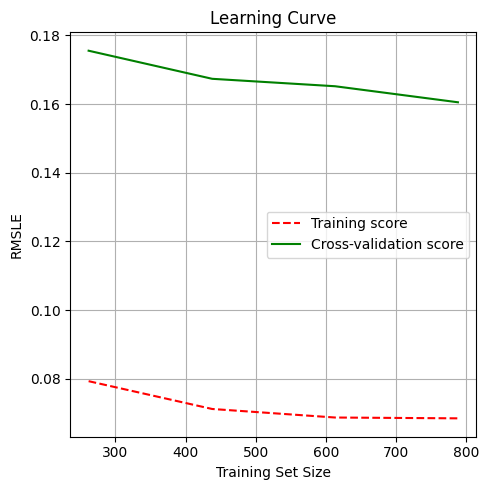

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [78]:
lc_plot(Rdm_forest,Xtv,ytv)

#### 7.2. Método no supervisado + Método supervisado

##### 7.2.1. PCA + Random Forest

In [79]:
X = train.drop(['SalePrice'],axis = 1)
y = train['SalePrice'].values

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_t1 = pca.fit_transform(X)
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtv, Xts, ytv, yts = train_test_split(X_t1, y, test_size=test_size)
Rdm_forest = RandomForestRegressor(n_estimators = 15,max_depth = 11)

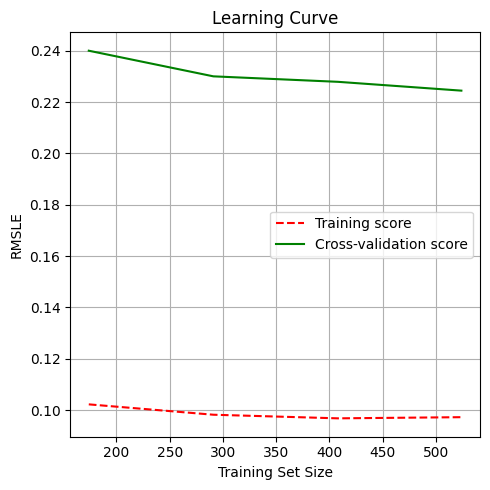

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [81]:
lc_plot(Rdm_forest,Xtv,ytv)